<a href="https://colab.research.google.com/github/Tommy3072/MineriaDeDatos/blob/main/Taller8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     balance_control  duracion_prestamo  historial_credito  proposito  monto  \
0                  1                  6                  4          8   1169   
1                  2                 48                  1          8   5951   
2                  4                 12                  4          5   2096   
3                  1                 42                  1          6   7882   
4                  1                 24                  5          2   4870   
..               ...                ...                ...        ...    ...   
995                4                 12                  1          6   1736   
996                1                 30                  1          3   3857   
997                4                 12                  1          8    804   
998                1                 45                  1          8   1845   
999                2                 45                  4          3   4576   

     saldo_ahorro  longitud_empleo  tas

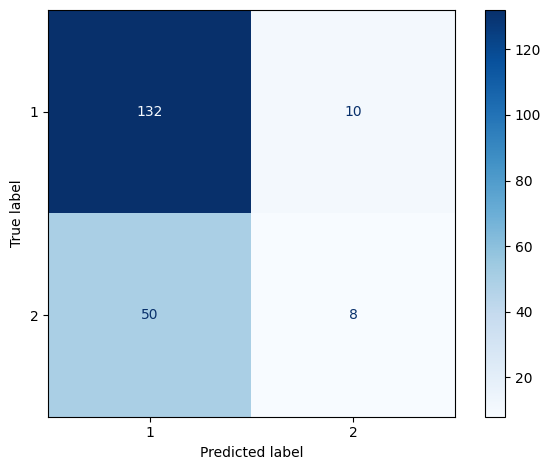

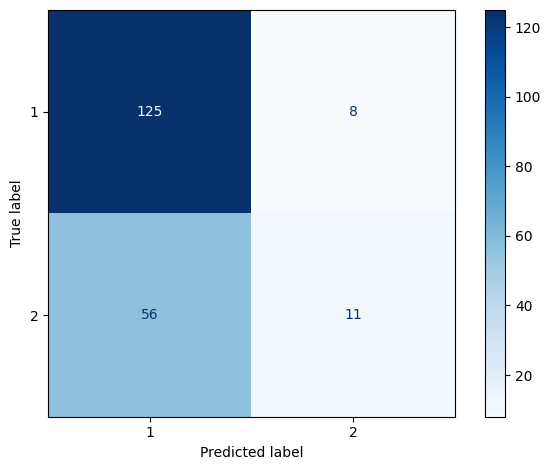

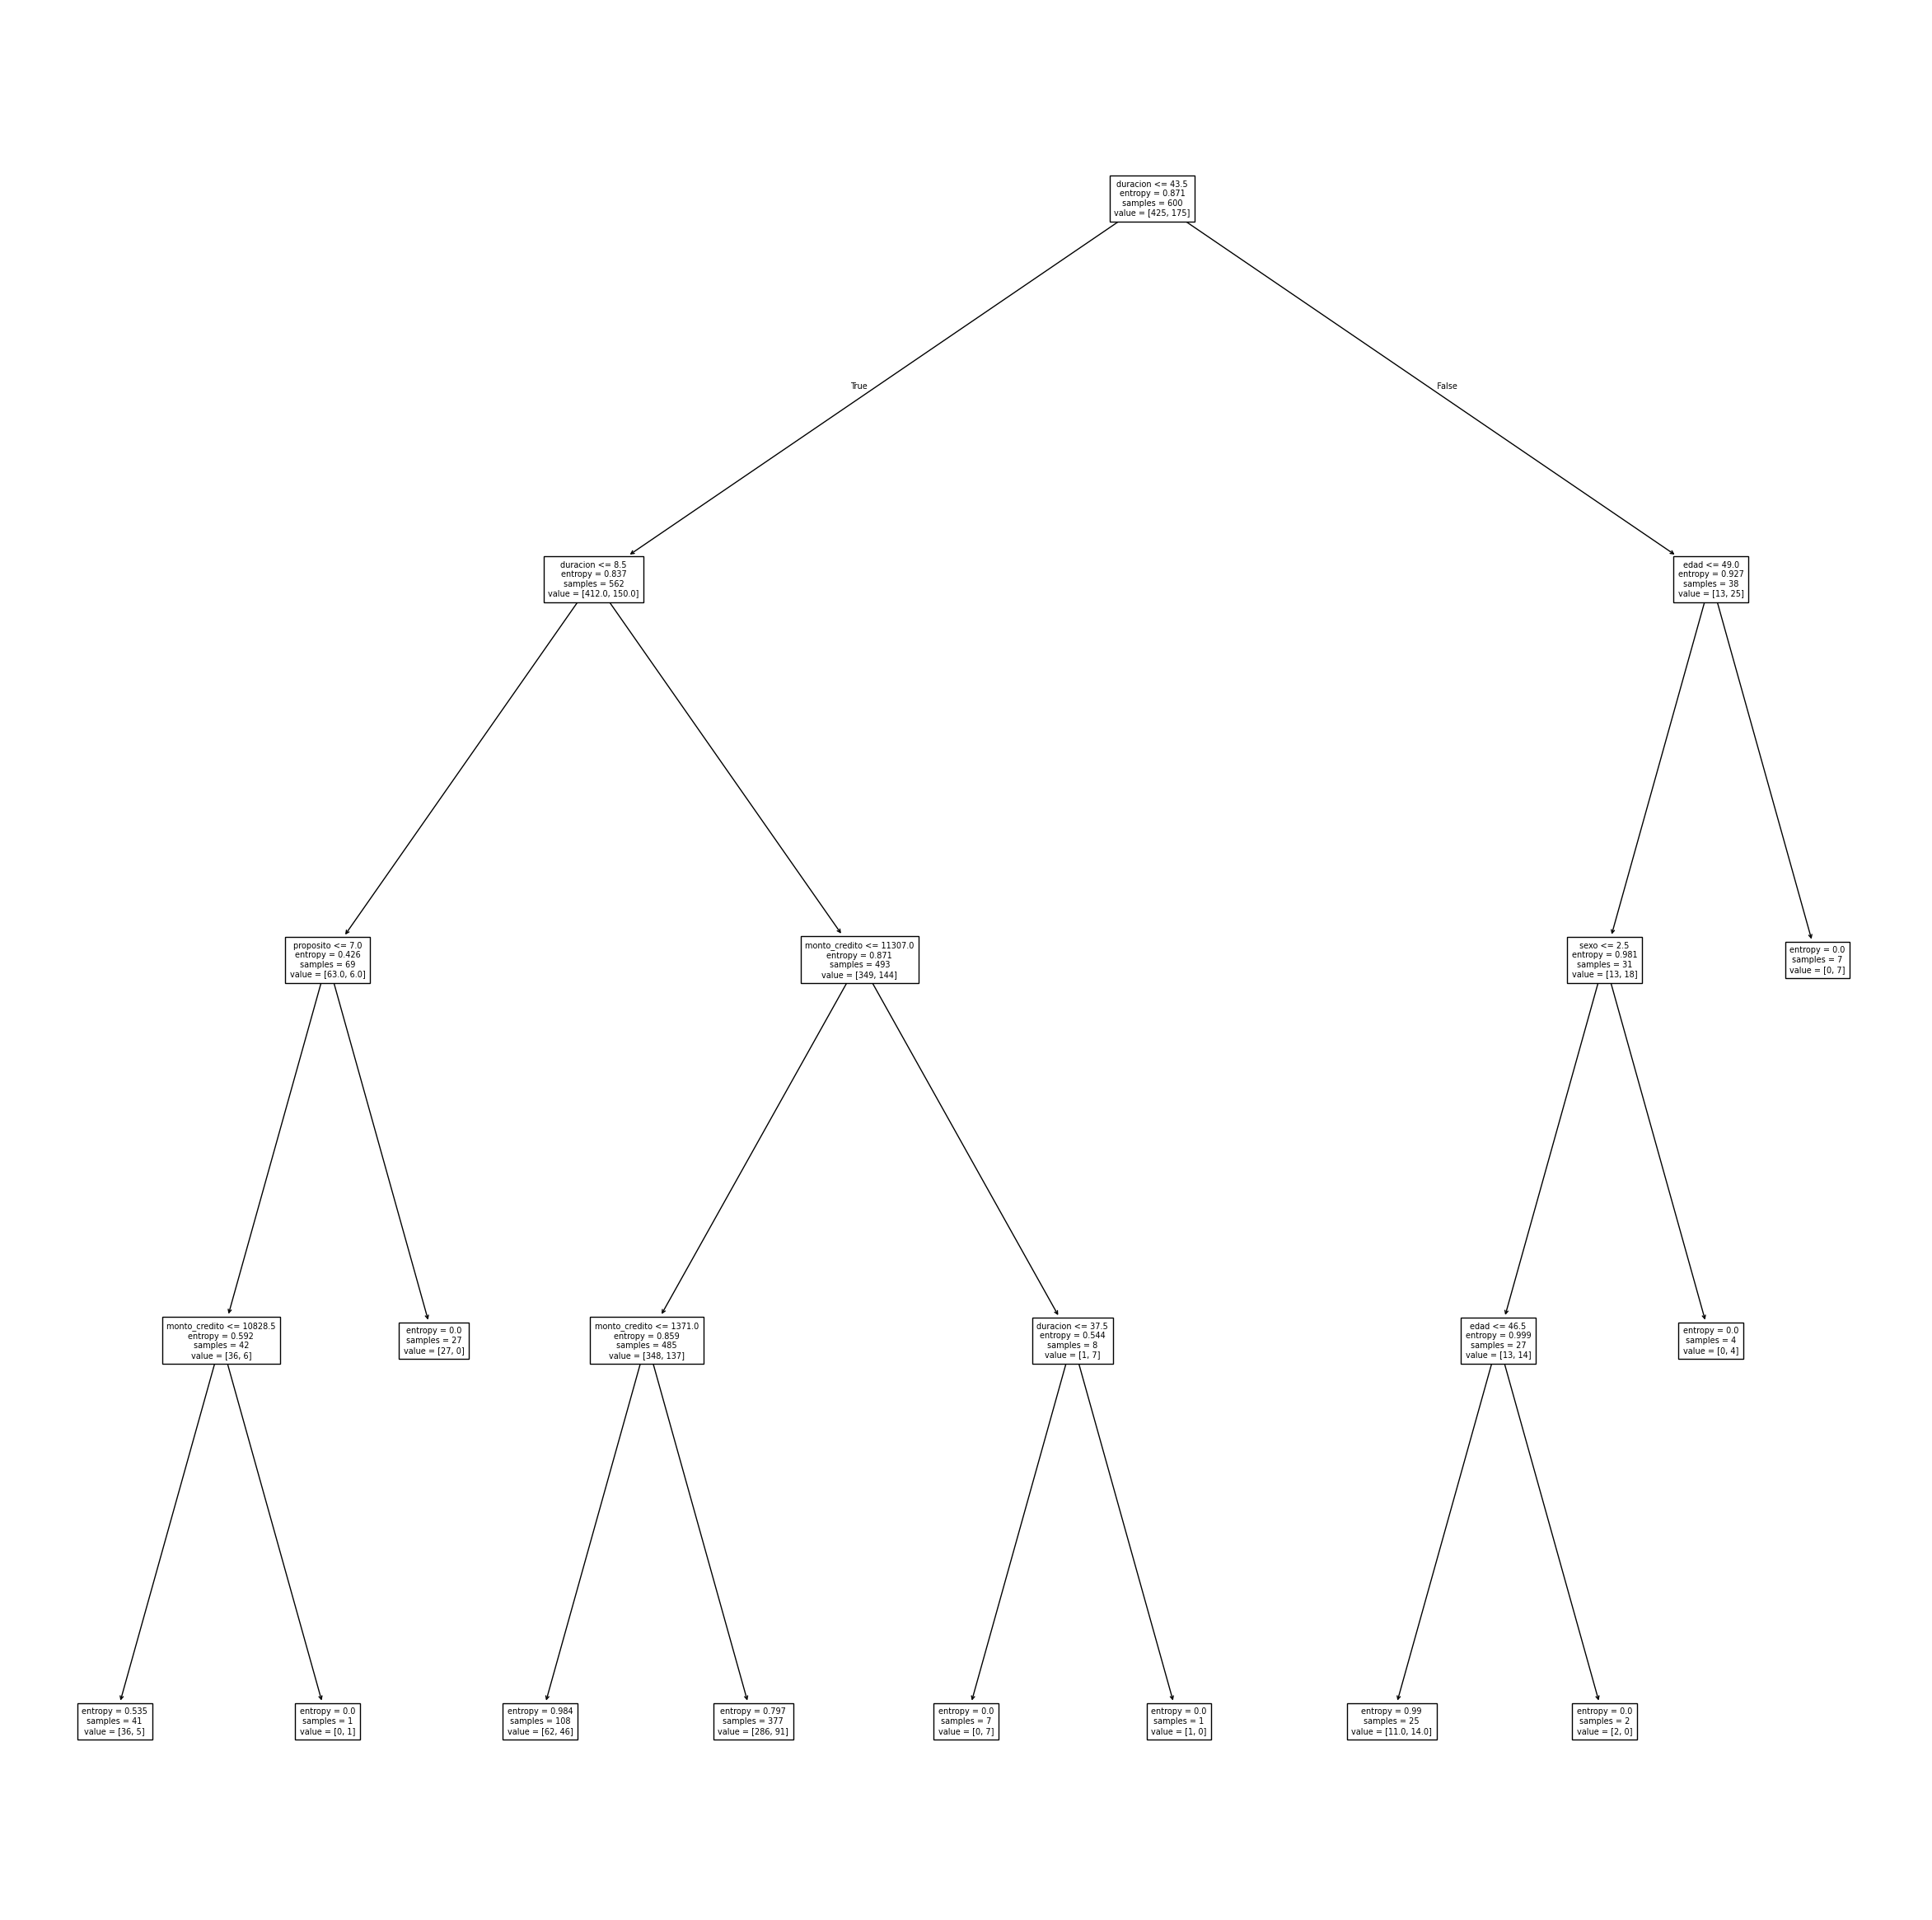

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree


df = pd.read_csv("credito.csv")
print(df)

X = df[["edad" ,"alojamiento", "monto","duracion_prestamo","proposito","trabajador_extranjero"]]
y = df["incumplimiento"]





""" X=df[["edad","sexo","monto_credito","duracion","proposito","clase_riesgo"]]
y=df["incumplimiento"] """

'''
 Framework heldout y lo que haremos es dividir el dataset en
60% training
40% evaluar (temp) => 20% evaluacion y 20% test
'''

x_train, x_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4,train_size=0.6)
x_test, x_eval, y_test, y_eval = train_test_split(x_temp,y_temp,test_size = 0.5,train_size =0.5)


print (len(x_train))
print (x_train)
print (len(x_eval))
print (x_eval)
print (len(x_test))
print (x_test)

#Me genera el modelo es decir entreno ... ok????
#criterion = gini|entropy

model = tree.DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=2, criterion="entropy", min_samples_leaf=1).fit(x_train, y_train) #tree.DecisionTreeRegressor()
print (str(model.classes_))
print (y)
#Despues de entrenar el modelo, yo voy a ver como le va en el de evaluacion (20%)
print (str(model.predict_proba(x_eval)))
print (str(model.predict(x_eval)))


cm_1 = confusion_matrix(y_eval, model.predict(x_eval), labels=model.classes_)
#esta funcion construye el grafico de la matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1,display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.tight_layout()
#Graba el grafico en un archivo
plt.savefig("lr-eval.png")
#te imprime por pantalla la matriz de confusion
print (str(cm_1))
#te imprime las metricas: recall, precision, accuracy
print(classification_report(y_eval, model.predict(x_eval)))

#print (str(model.predict_proba(x_test)))
#print (str(model.predict(x_test)))
cm_2 = confusion_matrix(y_test, model.predict(x_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2,display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.tight_layout()
plt.savefig("lr-test.png")
print (str(cm_2))
print(classification_report(y_test, model.predict(x_test)))

plt.figure(figsize=(30,30),dpi=100)
tree.plot_tree(model, feature_names=["edad","sexo","monto_credito","duracion","proposito","clase_riesgo"],fontsize=7)
plt.savefig("tree.png")